<a href="https://colab.research.google.com/github/cinaral/saymyname/blob/master/Canonical_FormClosedLoopSystemTry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

enter coefficients of numerator of input function = 1
enter coefficients of denumerator of input function = 1
Input or reference function in s domain

1
-
1

enter coefficients of numerator of canonical plant function = 1
enter coefficients of denumerator of canonical plant function = 1 1
Canonical plant function in s domain

  1
-----
s + 1

enter coefficients of numerator of canonical feedback function = 1 0
enter coefficients of denumerator of canonical feedback function = 1
Canonical feedback function in s domain

s
-
1

Open loop transfer function

  s
-----
s + 1

Closed loop transfer function

     s + 1
---------------
2 s^2 + 3 s + 1

Output in s domain

     s + 1
---------------
2 s^2 + 3 s + 1

Step response


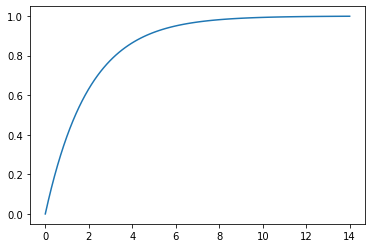

Impulse responce


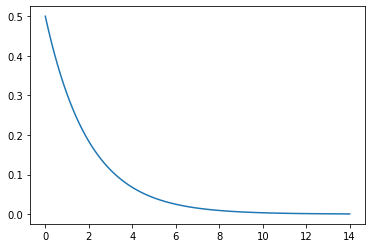

Bode plot


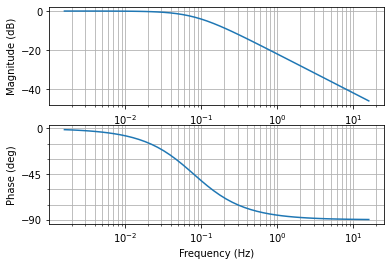

[[[0.98058068 0.4472136  0.04993762]]]
[[[-0.19739556 -1.10714872 -1.52083793]]]
[0.1, 1.0, 10.0]


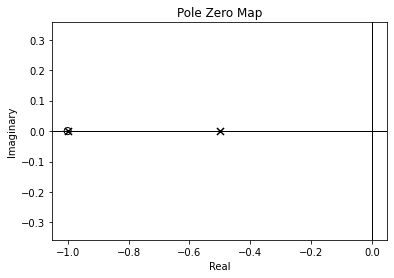

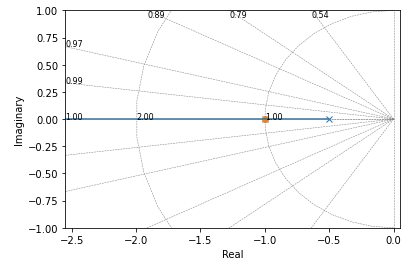

In [40]:
!pip install control
#!pip install pydy
#!pip install slycot
#!pip install bqplot
#!pip install ipyvolume
#!pip install phoebe

import matplotlib
import ipywidgets
import plotly
import numpy as np
import math 
#import control
#import pydy
#import phoebe
import os
from IPython import *
#import bqplot as bqp
#import ipyvolume as ipv
import scipy

%matplotlib inline
from sympy import symbols
from sympy import simplify
from sympy.abc import s, t, a
from sympy.integrals import *
from sympy.plotting import *
from control import *
from control.matlab import *
import matplotlib.pyplot as plt



#Matlab form by using python.control
#You can write any s domain functions in the form; a b c ... 
#where a corresponds to coefficient of nth order term, 
#b is the coefficient of (n-1)th order term and so on.

numX = list(map(float,input('enter coefficients of numerator of input function = ').split()))
denX = list(map(float,input('enter coefficients of denumerator of input function = ').split()))
X = tf(numX, denX)
print('Input or reference function in s domain')
print(X)

numG = list(map(float,input('enter coefficients of numerator of canonical plant function = ').split()))
denG = list(map(float,input('enter coefficients of denumerator of canonical plant function = ').split()))
G = tf(numG, denG)
print('Canonical plant function in s domain')
print(G)

numH = list(map(float,input('enter coefficients of numerator of canonical feedback function = ').split()))
denH = list(map(float,input('enter coefficients of denumerator of canonical feedback function = ').split()))
H = tf(numH, denH)
print('Canonical feedback function in s domain')
print(H)

GH = G*H
print('Open loop transfer function')
print(GH)

M = G/(1+G*H)
print('Closed loop transfer function')
print(M)

Y = M*X
print('Output in s domain')
print(Y)

# Step response for the system
print('Step response')
plt.figure(1)
yout, T = step(M)
plt.plot(T.T, yout.T)
plt.show(block=False)

#impulse responce
print('Impulse responce')
plt.figure(2)
yout, T = impulse(M)
plt.plot(T.T, yout.T)
plt.show(block=False)

# Bode plot for the system
print('Bode plot')
plt.figure(3)
mag, phase, om = bode(M, logspace(-2, 2), Plot=True)
plt.show(block=False)

#Positions of poles and zeros
pzmap(M,Plot=True,grid=False, title='Pole Zero Map')

# Root lcous plot for the system
rlocus(M)
